In [38]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_log_error
plt.rcParams['figure.figsize'] = [15,8]

In [39]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [40]:
#Reading first 10 entries in train dataset
train.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [7]:
#Checking for empty value/null value in training dataset
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

From the above output, we can see that there is no any unknown entry.

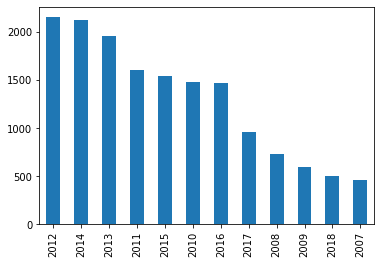

In [11]:
#Plotting the bar graph for first 12 values of production year column from train dataset.
train['Prod. year'].value_counts().head(12).plot.bar()

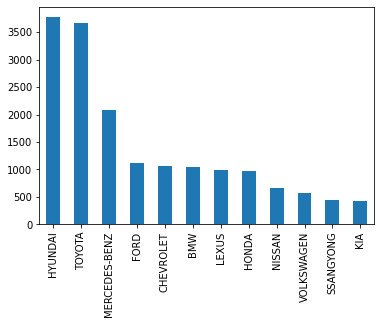

In [12]:
#Similarly, plotting graph for manufacturers column
train['Manufacturer'].value_counts().head(12).plot.bar()

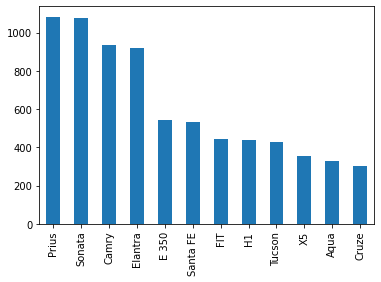

In [13]:
train['Model'].value_counts().head(12).plot.bar()

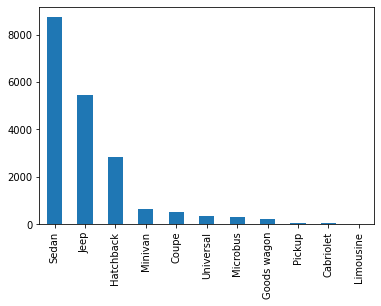

In [14]:
train['Category'].value_counts().plot.bar()

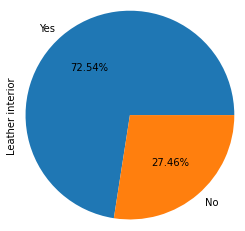

In [15]:
train['Leather interior'].value_counts().plot.pie(radius=1.2,autopct='%0.2f%%')

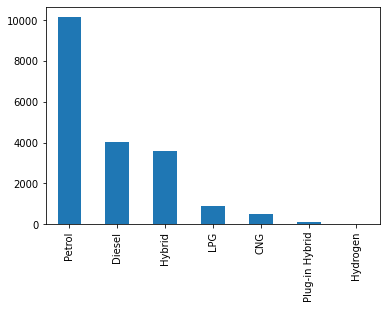

In [16]:
train['Fuel type'].value_counts().plot.bar()

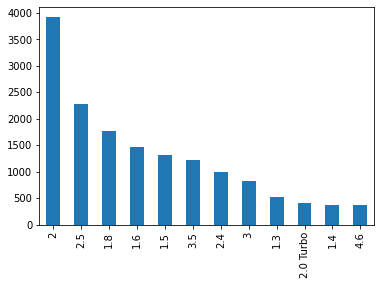

In [17]:
train['Engine volume'].value_counts().head(12).plot.bar()

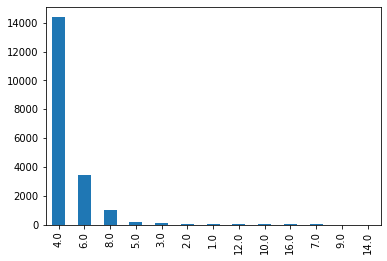

In [18]:
train['Cylinders'].value_counts().plot.bar()

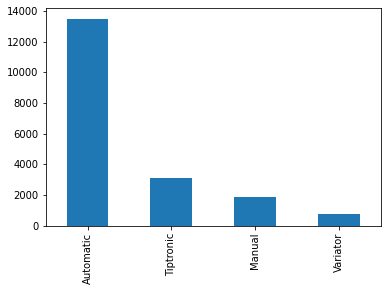

In [19]:
train['Gear box type'].value_counts().plot.bar()

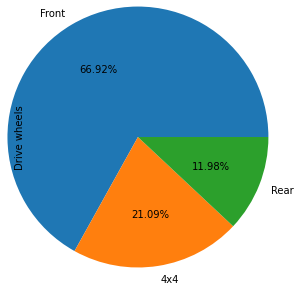

In [20]:
train['Drive wheels'].value_counts().plot.pie(radius=1.5,autopct='%0.2f%%')

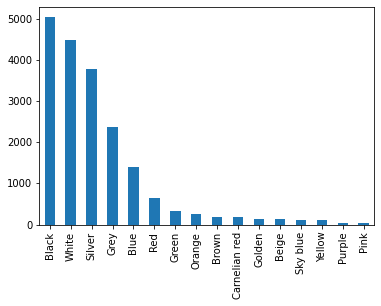

In [21]:
train['Color'].value_counts().plot.bar()

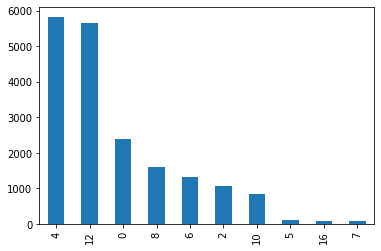

In [22]:
train['Airbags'].value_counts().head(10).plot.bar()

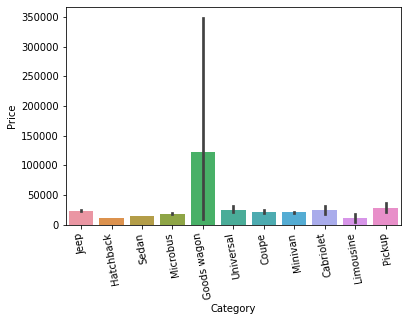

In [23]:
plt.xticks(rotation=100)
sns.barplot(x='Category',y='Price',data=train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


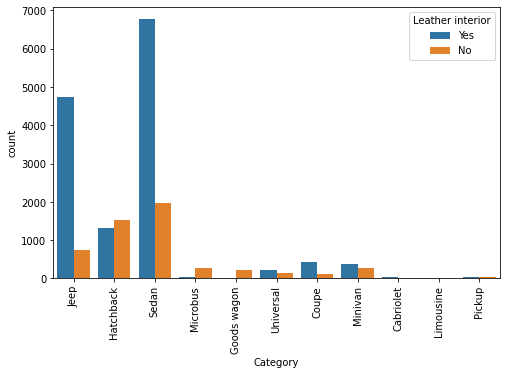

In [24]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot('Category',hue='Leather interior',data=train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


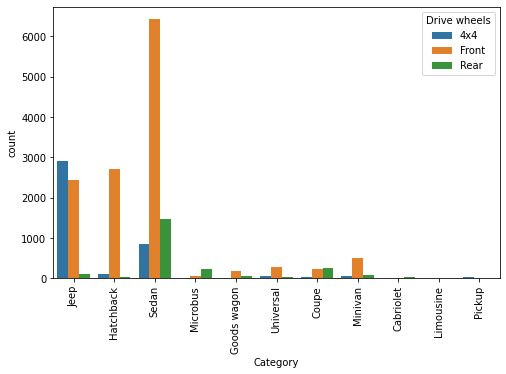

In [25]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot('Category',hue='Drive wheels',data=train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


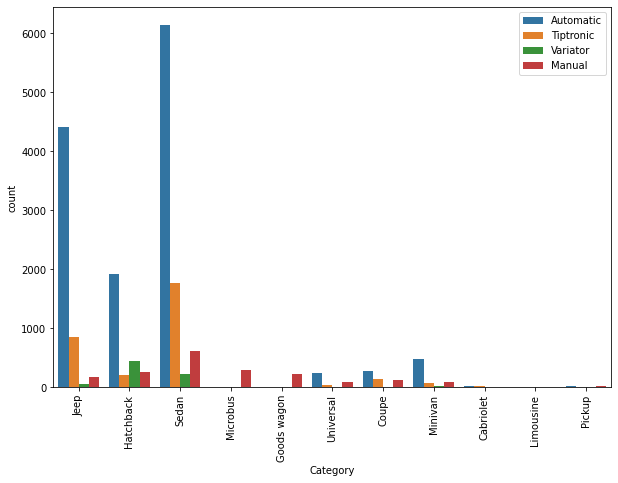

In [29]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot('Category',hue="Gear box type",data=train)
plt.legend(loc="upper right")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


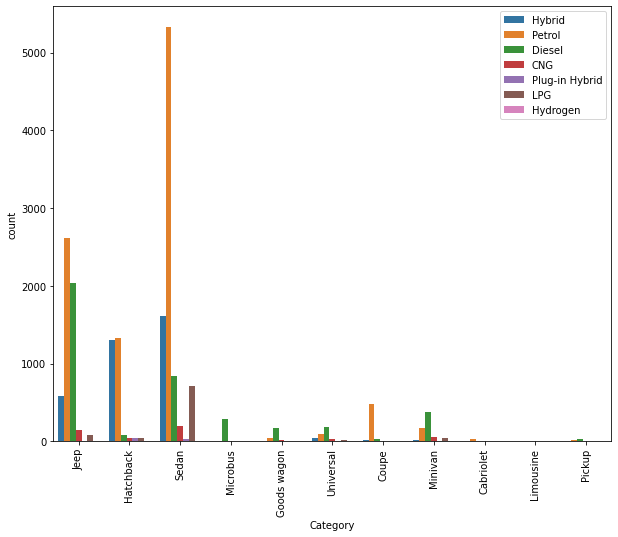

In [30]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.countplot('Category',hue="Fuel type",data=train)
plt.legend(loc="upper right")

In [31]:
train['Manufacturer'].value_counts().head(5)

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
Name: Manufacturer, dtype: int64

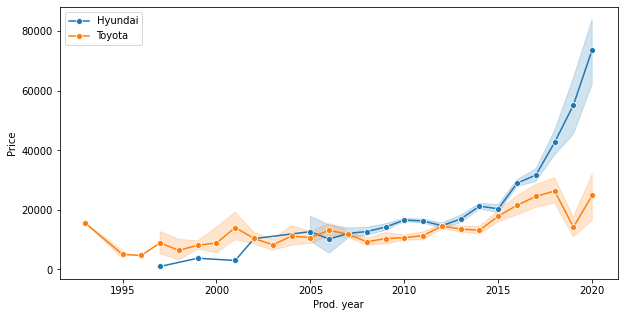

In [32]:
plt.figure(figsize=(10,5))
df_HYUNDAI=train[train['Manufacturer']=="HYUNDAI"].copy()
df_TOYOTA=train[train['Manufacturer']=="TOYOTA"].copy()
sns.lineplot(x='Prod. year',y='Price',marker='o',data=df_HYUNDAI,label='Hyundai')
sns.lineplot(x='Prod. year',y='Price',marker='o',data=df_TOYOTA,label='Toyota')
plt.legend(loc="upper left")
plt.show()
